In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.feature_extraction.text import CountVectorizer
from keras.preprocessing.text import Tokenizer
from keras.wrappers.scikit_learn import KerasClassifier
from keras import layers
from sklearn import tree
from sklearn.decomposition import PCA

In [ ]:
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [ ]:
from nltk import ngrams
from nltk.tokenize import sent_tokenize
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.stem import PorterStemmer
from nltk.stem import PorterStemmer
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [ ]:
data = pd.read_csv('/content/sqli.csv',encoding='utf-16')

In [ ]:
data.head

<bound method NDFrame.head of                                                Sentence  Label
0                                                     a      1
1                                                   a'       1
2                                                 a' --      1
3                                       a' or 1 = 1; --      1
4                                                     @      1
...                                                 ...    ...
4195   org/?option = com_k2  <a href = "http://corfopym      0
4196  com/?option = com_k2  <act>  <![CDATA[procMemb...      0
4197                                          picsearch      0
4198  com/is?-WZx-uhyLezKNiYLvAbKL3W4oh5F749nr2KUmFF...      0
4199  de]]>  </email_address>   <find_account_answer...      0

[4200 rows x 2 columns]>

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4200 entries, 0 to 4199
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Sentence  4187 non-null   object
 1   Label     4200 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 65.8+ KB


In [ ]:
data.describe()

,Label
count,4200.000000
mean,0.268571
std,0.443269
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


In [ ]:
data

,Sentence,Label
0,a,1
1,a',1
2,a' --,1
3,a' or 1 = 1; --,1
4,@,1
...,...,...
4195,"org/?option = com_k2 <a href = ""http://corfopym",0
4196,com/?option = com_k2 <act> <![CDATA[procMemb...,0
4197,picsearch,0
4198,com/is?-WZx-uhyLezKNiYLvAbKL3W4oh5F749nr2KUmFF...,0


In [ ]:
df=data

In [ ]:
df.columns

Index(['Sentence', 'Label'], dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4200 entries, 0 to 4199
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Sentence  4187 non-null   object
 1   Label     4200 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 65.8+ KB


In [ ]:
vectorizer = CountVectorizer(min_df=2, max_df=0.7,stop_words=stopwords.words('english'))


In [ ]:
posts = vectorizer.fit_transform(df['Sentence'].values.astype('U')).toarray()

In [ ]:
posts

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0]])

In [ ]:
transformed_posts=pd.DataFrame(posts)

In [ ]:
df=pd.concat([df,transformed_posts], axis=1)

In [ ]:
df

,Sentence,Label,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,...,4677,4678,4679,4680,4681,4682,4683,4684,4685,4686,4687,4688,4689,4690,4691,4692,4693,4694,4695,4696,4697,4698,4699,4700,4701,4702,4703,4704,4705,4706,4707,4708,4709,4710,4711,4712,4713,4714,4715,4716
0,a,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,a',1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,a' --,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,a' or 1 = 1; --,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,@,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4195,"org/?option = com_k2 <a href = ""http://corfopym",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4196,com/?option = com_k2 <act> <![CDATA[procMemb...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4197,picsearch,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4198,com/is?-WZx-uhyLezKNiYLvAbKL3W4oh5F749nr2KUmFF...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
X=df[df.columns[2:]]

In [ ]:
y=df['Label']

In [ ]:
y

0       1
1       1
2       1
3       1
4       1
       ..
4195    0
4196    0
4197    0
4198    0
4199    0
Name: Label, Length: 4200, dtype: int64

In [ ]:
y.value_counts()

0    3072
1    1128
Name: Label, dtype: int64

**Balancear**

**UNDER SAMPLER**



In [ ]:
rus = RandomUnderSampler(random_state=0)
X_rus, y_rus = rus.fit_resample(X,y)
pd.Series(y_rus).value_counts()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


1    1128
0    1128
dtype: int64

**OVER SAMPLER**

In [ ]:
ros = RandomOverSampler(random_state=0)
X_ros, y_ros = ros.fit_resample(X,y)
pd.Series(y_ros).value_counts()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


1    3072
0    3072
dtype: int64

In [ ]:
sm = SMOTE(random_state=0)
X_sm, y_sm = sm.fit_resample(X,y)
pd.Series(y_sm).value_counts()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


1    3072
0    3072
dtype: int64

In [ ]:
def trainTestSplit(X,y):
  X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)
  return X_train,X_test,y_train,y_test

def escalado(X_train,X_test):
  sc = StandardScaler()
  sc.fit(X_train)
  return sc.transform(X_train),sc.transform(X_test)

def generarPCA(n_componentes,X):
  pca = PCA(n_components=n_componentes)
  cp = pca.fit_transform(X)
  return pd.DataFrame(data=cp)


#RNN Simple
def modelo():
  input_dim = X_train.shape[1]  # Number of features
  model=Sequential()
  model.add(Dense(20,input_dim = input_dim,activation='relu'))
  model.add(Dense(10,activation='tanh'))
  model.add(Dense(1024,activation='relu'))
  model.add(layers.BatchNormalization())
  model.add(layers.Dropout(0.5))
  model.add(Dense(1,activation='sigmoid'))
  model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
  return model  


def modelo2():
  model = Sequential()
  model.add(Dense(18,activation='relu'))
  model.add(Dense(7,activation='relu'))
  model.add(Dense(1,activation='sigmoid'))
  model.compile(optimizer='adam',loss = 'binary_crossentropy',metrics=['accuracy'])
  #binary_crossentropy / categorical_crossentropy
  return model



def lossGraph(model): 
  loss = pd.DataFrame(model.history.history)
  plt.figure(figsize=(15,5))
  sns.lineplot(data=loss,lw=3)
  sns.despine()

def pred(model,X_test,y_test):
  pred=model.predict(X_test)
  for i in range(len(pred)):
    if pred[i]>0.5:
        pred[i]=1
    elif pred[i]<=0.5:
        pred[i]=0
  return accuracy_score(y_test,pred)


**ANN**

In [ ]:
X_train,X_test,y_train,y_test = trainTestSplit(X,y)

In [ ]:
modelSinPCA_sinBalanceo2 = modelo2()

In [ ]:
modelSinPCA_sinBalanceo2.fit(x=X_train,y=y_train,validation_data=(X_test,y_test),batch_size=250,epochs=30,verbose=1)

Epoch 1/30
12/12 [==============================] - 24s 79ms/step - loss: 0.6643 - accuracy: 0.7221 - val_loss: 0.6117 - val_accuracy: 0.7325
Epoch 2/30
12/12 [==============================] - 0s 19ms/step - loss: 0.5826 - accuracy: 0.7314 - val_loss: 0.5168 - val_accuracy: 0.7325
Epoch 3/30
12/12 [==============================] - 0s 22ms/step - loss: 0.4764 - accuracy: 0.7405 - val_loss: 0.4304 - val_accuracy: 0.7325
Epoch 4/30
12/12 [==============================] - 0s 19ms/step - loss: 0.4013 - accuracy: 0.7267 - val_loss: 0.3719 - val_accuracy: 0.7325
Epoch 5/30
12/12 [==============================] - 0s 21ms/step - loss: 0.3450 - accuracy: 0.7259 - val_loss: 0.3351 - val_accuracy: 0.7333
Epoch 6/30
12/12 [==============================] - 0s 20ms/step - loss: 0.3089 - accuracy: 0.7391 - val_loss: 0.3105 - val_accuracy: 0.7825
Epoch 7/30
12/12 [==============================] - 0s 20ms/step - loss: 0.2889 - accuracy: 0.8006 - val_loss: 0.2927 - val_accuracy: 0.7992
Epoch 8/30
1

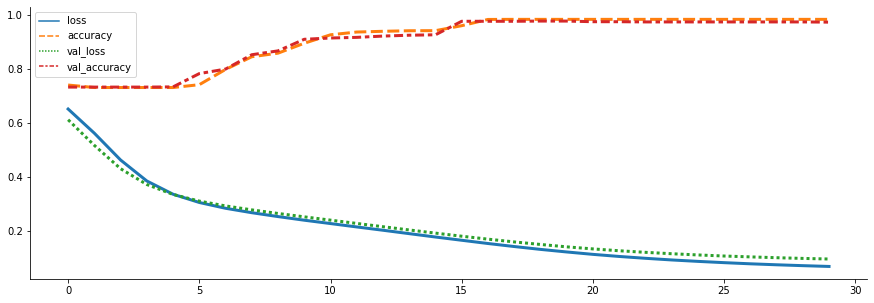

In [ ]:
lossGraph(modelSinPCA_sinBalanceo2)

In [ ]:
X_train,X_test,y_train,y_test = trainTestSplit(X,y)


In [ ]:
pred(modelSinPCA_sinBalanceo2,X_test,y_test)

0.9825396825396825

In [ ]:
r2_score(y_train, modelSinPCA_sinBalanceo2.predict(X_train))

0.8979813177307387

In [ ]:
mean_absolute_error(y_train, modelSinPCA_sinBalanceo2.predict(X_train))

0.05998475309735362

In [ ]:
modelSinPCA_sinBalanceo = modelo()

In [ ]:
modelSinPCA_sinBalanceo.fit(x=X_train,y=y_train,validation_data=(X_test,y_test),batch_size=15,epochs=10,verbose=1)

Epoch 1/10
196/196 [==============================] - 2s 5ms/step - loss: 0.2225 - accuracy: 0.9020 - val_loss: 0.5525 - val_accuracy: 0.7357
Epoch 2/10
196/196 [==============================] - 1s 4ms/step - loss: 0.1227 - accuracy: 0.9541 - val_loss: 0.3774 - val_accuracy: 0.7437
Epoch 3/10
196/196 [==============================] - 1s 4ms/step - loss: 0.0961 - accuracy: 0.9633 - val_loss: 0.1189 - val_accuracy: 0.9246
Epoch 4/10
196/196 [==============================] - 1s 4ms/step - loss: 0.0888 - accuracy: 0.9690 - val_loss: 0.0833 - val_accuracy: 0.9675
Epoch 5/10
196/196 [==============================] - 1s 4ms/step - loss: 0.0810 - accuracy: 0.9701 - val_loss: 0.0628 - val_accuracy: 0.9770
Epoch 6/10
196/196 [==============================] - 1s 4ms/step - loss: 0.0849 - accuracy: 0.9690 - val_loss: 0.0704 - val_accuracy: 0.9778
Epoch 7/10
196/196 [==============================] - 1s 4ms/step - loss: 0.0775 - accuracy: 0.9690 - val_loss: 0.0808 - val_accuracy: 0.9698
Epoch 

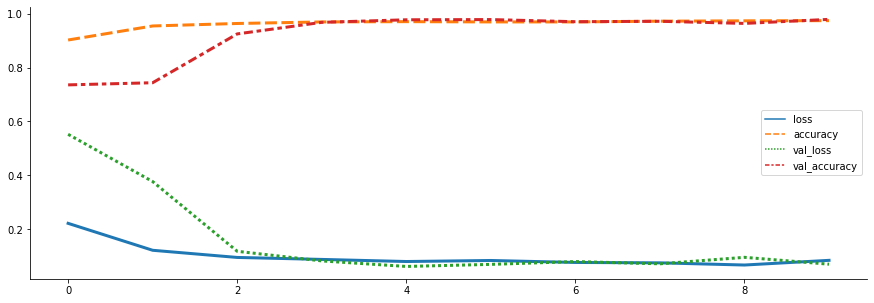

In [ ]:
lossGraph(modelSinPCA_sinBalanceo)

In [ ]:
pred(modelSinPCA_sinBalanceo,X_test, y_test)

0.9785714285714285

In [ ]:
r2_score(y_train, modelSinPCA_sinBalanceo.predict(X_train))

0.9213500239134208

In [ ]:
mean_absolute_error(y_train, modelSinPCA_sinBalanceo.predict(X_train))

0.04069691914728701

In [ ]:
#Guardar weights para la exportación
modelSinPCA_sinBalanceo.save_weights("model.h5")

In [ ]:
modelSinPCA_sinBalanceo.save("modelo.h5")
print("Saved model to disk")

Saved model to disk


In [ ]:
from google.colab import files
files.download("modelo.h5")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from google.colab import files
files.download("model.h5")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import pickle
with open('vectorizer_cnn.pkl', 'wb') as fin:
    pickle.dump(vectorizer, fin)


In [ ]:
from google.colab import files
files.download("vectorizer_cnn.pkl")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Sin Escalado con PCA sin Balanceo

In [ ]:
X_train,X_test,y_train,y_test = trainTestSplit(generarPCA(2,X),y)

In [ ]:
modelConPCA_sinBalanceo = modelo()

In [ ]:
modelConPCA_sinBalanceo.fit(x=X_train,y=y_train,validation_data=(X_test,y_test),batch_size=15,epochs=10,verbose=1)

Epoch 1/10
196/196 [==============================] - 2s 6ms/step - loss: 0.4093 - accuracy: 0.8318 - val_loss: 0.4740 - val_accuracy: 0.7405
Epoch 2/10
196/196 [==============================] - 1s 4ms/step - loss: 0.3028 - accuracy: 0.8666 - val_loss: 0.3317 - val_accuracy: 0.8794
Epoch 3/10
196/196 [==============================] - 1s 4ms/step - loss: 0.2905 - accuracy: 0.8620 - val_loss: 0.2419 - val_accuracy: 0.8810
Epoch 4/10
196/196 [==============================] - 1s 4ms/step - loss: 0.2467 - accuracy: 0.8816 - val_loss: 0.2501 - val_accuracy: 0.8833
Epoch 5/10
196/196 [==============================] - 1s 4ms/step - loss: 0.2646 - accuracy: 0.8652 - val_loss: 0.1873 - val_accuracy: 0.8849
Epoch 6/10
196/196 [==============================] - 1s 3ms/step - loss: 0.2549 - accuracy: 0.8716 - val_loss: 0.1746 - val_accuracy: 0.8873
Epoch 7/10
196/196 [==============================] - 1s 4ms/step - loss: 0.2546 - accuracy: 0.8723 - val_loss: 0.2001 - val_accuracy: 0.8849
Epoch 

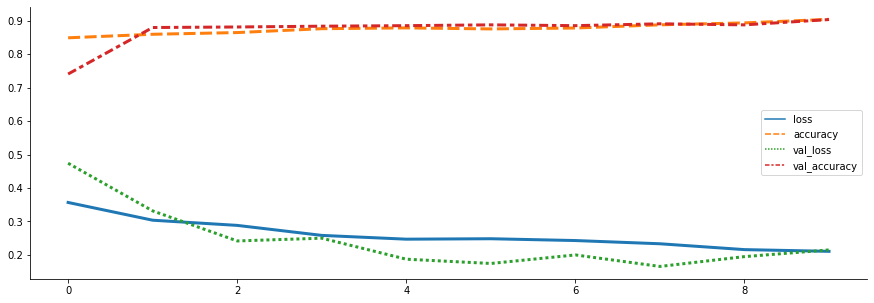

In [ ]:
lossGraph(modelConPCA_sinBalanceo)

In [ ]:
pred(modelConPCA_sinBalanceo,X_test, y_test)

0.9031746031746032

Sin escalado sin PCA con balaceo Over

In [ ]:
X_train,X_test,y_train,y_test = trainTestSplit(X_ros,y_ros)

In [ ]:
modelSinPCA_conBalanceoOver = modelo()

In [ ]:
modelSinPCA_conBalanceoOver.fit(x=X_train,y=y_train,validation_data=(X_test,y_test),batch_size=20,epochs=10,verbose=1)

Epoch 1/10
215/215 [==============================] - 3s 8ms/step - loss: 0.3008 - accuracy: 0.8570 - val_loss: 0.4899 - val_accuracy: 0.8454
Epoch 2/10
215/215 [==============================] - 1s 7ms/step - loss: 0.0759 - accuracy: 0.9771 - val_loss: 0.2440 - val_accuracy: 0.9870
Epoch 3/10
215/215 [==============================] - 1s 6ms/step - loss: 0.0654 - accuracy: 0.9810 - val_loss: 0.0625 - val_accuracy: 0.9859
Epoch 4/10
215/215 [==============================] - 1s 6ms/step - loss: 0.0721 - accuracy: 0.9809 - val_loss: 0.0645 - val_accuracy: 0.9870
Epoch 5/10
215/215 [==============================] - 1s 6ms/step - loss: 0.0694 - accuracy: 0.9793 - val_loss: 0.0703 - val_accuracy: 0.9794
Epoch 6/10
215/215 [==============================] - 1s 7ms/step - loss: 0.0578 - accuracy: 0.9869 - val_loss: 0.0571 - val_accuracy: 0.9821
Epoch 7/10
215/215 [==============================] - 1s 7ms/step - loss: 0.0680 - accuracy: 0.9845 - val_loss: 0.0618 - val_accuracy: 0.9805
Epoch 

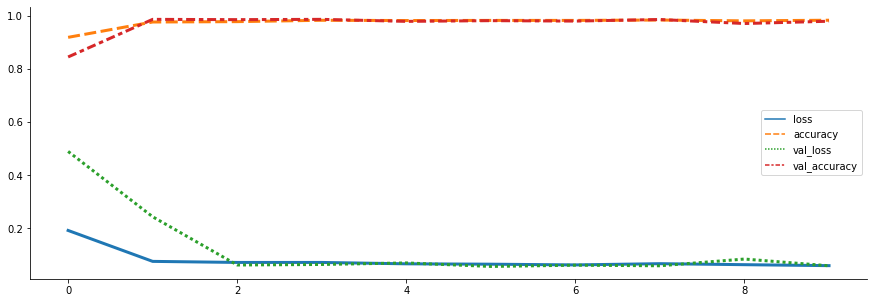

In [ ]:
lossGraph(modelSinPCA_conBalanceoOver)

In [ ]:
pred(modelSinPCA_conBalanceoOver,X_test, y_test)

0.9799349240780911

In [ ]:
r2_score(y_train, modelSinPCA_conBalanceoOver.predict(X_train))

0.9493417690631852

In [ ]:
mean_absolute_error(y_train, modelSinPCA_conBalanceoOver.predict(X_train))

0.02074898092098006

Sin escalado sin PCA con balaceo under

In [ ]:
X_train,X_test,y_train,y_test = trainTestSplit(X_rus,y_rus)
modelSinPCA_conBalanceoUnder = modelo()

In [ ]:
modelSinPCA_conBalanceoUnder.fit(x=X_train,y=y_train,validation_data=(X_test,y_test),batch_size=10,epochs=15,verbose=1)

Epoch 1/15
158/158 [==============================] - 3s 8ms/step - loss: 0.3862 - accuracy: 0.8254 - val_loss: 0.5666 - val_accuracy: 0.7489
Epoch 2/15
158/158 [==============================] - 1s 5ms/step - loss: 0.1607 - accuracy: 0.9489 - val_loss: 0.3389 - val_accuracy: 0.9468
Epoch 3/15
158/158 [==============================] - 1s 6ms/step - loss: 0.0933 - accuracy: 0.9775 - val_loss: 0.2157 - val_accuracy: 0.9439
Epoch 4/15
158/158 [==============================] - 1s 5ms/step - loss: 0.1097 - accuracy: 0.9732 - val_loss: 0.1581 - val_accuracy: 0.9394
Epoch 5/15
158/158 [==============================] - 1s 5ms/step - loss: 0.0746 - accuracy: 0.9832 - val_loss: 0.2024 - val_accuracy: 0.9453
Epoch 6/15
158/158 [==============================] - 1s 5ms/step - loss: 0.0691 - accuracy: 0.9856 - val_loss: 0.1181 - val_accuracy: 0.9586
Epoch 7/15
158/158 [==============================] - 1s 6ms/step - loss: 0.0931 - accuracy: 0.9764 - val_loss: 0.1491 - val_accuracy: 0.9453
Epoch 

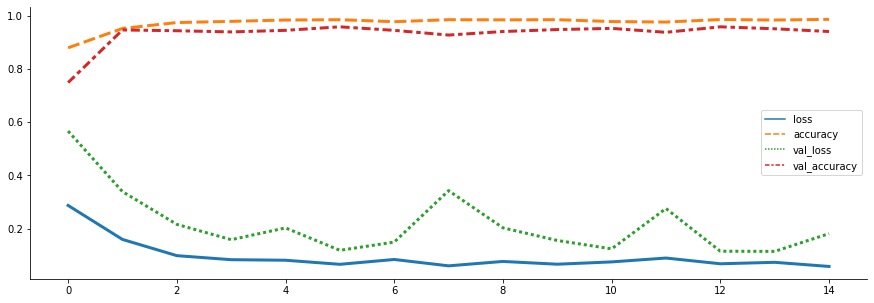

In [ ]:
lossGraph(modelSinPCA_conBalanceoUnder)

In [ ]:
pred(modelSinPCA_conBalanceoUnder,X_test, y_test)

0.9409158050221565

In [ ]:
r2_score(y_train, modelSinPCA_conBalanceoUnder.predict(X_train))

0.9594400722548672

In [ ]:
mean_absolute_error(y_train, modelSinPCA_conBalanceoUnder.predict(X_train))

0.012416136236479376

Sin escalado sin PCA con balaceo SMOTE

In [ ]:
X_train,X_test,y_train,y_test = trainTestSplit(X_sm,y_sm)
modelSinPCA_conBalanceoSmote = modelo()

In [ ]:
modelSinPCA_conBalanceoSmote.fit(x=X_train,y=y_train,validation_data=(X_test,y_test),batch_size=15,epochs=30,verbose=1)#15

Epoch 1/30
287/287 [==============================] - 4s 8ms/step - loss: 0.2787 - accuracy: 0.8832 - val_loss: 0.4995 - val_accuracy: 0.5597
Epoch 2/30
287/287 [==============================] - 2s 7ms/step - loss: 0.1253 - accuracy: 0.9600 - val_loss: 0.1113 - val_accuracy: 0.9756
Epoch 3/30
287/287 [==============================] - 2s 6ms/step - loss: 0.0926 - accuracy: 0.9736 - val_loss: 0.0951 - val_accuracy: 0.9767
Epoch 4/30
287/287 [==============================] - 2s 6ms/step - loss: 0.0741 - accuracy: 0.9810 - val_loss: 0.0703 - val_accuracy: 0.9783
Epoch 5/30
287/287 [==============================] - 2s 6ms/step - loss: 0.0770 - accuracy: 0.9784 - val_loss: 0.0733 - val_accuracy: 0.9783
Epoch 6/30
287/287 [==============================] - 2s 6ms/step - loss: 0.0811 - accuracy: 0.9801 - val_loss: 0.0961 - val_accuracy: 0.9767
Epoch 7/30
287/287 [==============================] - 2s 5ms/step - loss: 0.0802 - accuracy: 0.9813 - val_loss: 0.0751 - val_accuracy: 0.9778
Epoch 

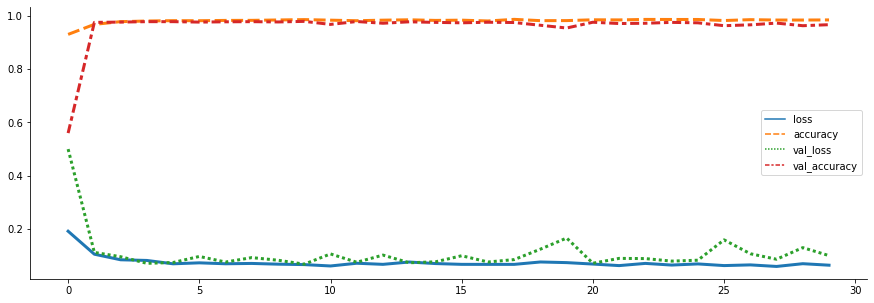

In [ ]:
lossGraph(modelSinPCA_conBalanceoSmote)

In [ ]:
pred(modelSinPCA_conBalanceoSmote,X_test, y_test)

0.9669197396963124

In [ ]:
r2_score(y_train, modelSinPCA_conBalanceoSmote.predict(X_train))

0.9551576194190847

In [ ]:
mean_absolute_error(y_train, modelSinPCA_conBalanceoSmote.predict(X_train))

0.016324785968766128

Sin escalado con PCA con balaceo Over

In [ ]:
X_train,X_test,y_train,y_test = trainTestSplit(generarPCA(2,X_ros),y_ros)
modelConPCA_conBalanceoOver = modelo()

In [ ]:
modelConPCA_conBalanceoOver.fit(x=X_train,y=y_train,validation_data=(X_test,y_test),batch_size=9,epochs=20,verbose=1)

Epoch 1/20
478/478 [==============================] - 3s 4ms/step - loss: 0.4603 - accuracy: 0.7529 - val_loss: 0.5060 - val_accuracy: 0.6670
Epoch 2/20
478/478 [==============================] - 2s 4ms/step - loss: 0.4165 - accuracy: 0.7746 - val_loss: 0.5310 - val_accuracy: 0.6920
Epoch 3/20
478/478 [==============================] - 2s 4ms/step - loss: 0.3963 - accuracy: 0.7890 - val_loss: 0.4246 - val_accuracy: 0.7543
Epoch 4/20
478/478 [==============================] - 2s 4ms/step - loss: 0.3665 - accuracy: 0.8153 - val_loss: 0.3115 - val_accuracy: 0.8709
Epoch 5/20
478/478 [==============================] - 2s 4ms/step - loss: 0.3780 - accuracy: 0.8252 - val_loss: 0.4750 - val_accuracy: 0.7652
Epoch 6/20
478/478 [==============================] - 2s 3ms/step - loss: 0.3547 - accuracy: 0.8325 - val_loss: 0.2863 - val_accuracy: 0.8639
Epoch 7/20
478/478 [==============================] - 2s 4ms/step - loss: 0.3356 - accuracy: 0.8354 - val_loss: 0.2550 - val_accuracy: 0.8937
Epoch 

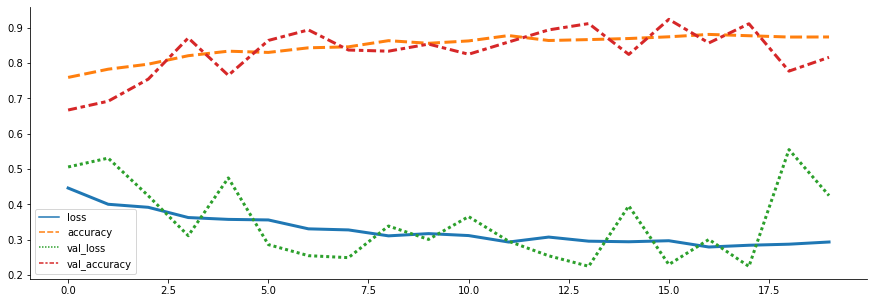

In [ ]:
lossGraph(modelConPCA_conBalanceoOver)

Sin escalado con PCA con balaceo Under ANN

In [ ]:
X_train,X_test,y_train,y_test = trainTestSplit(generarPCA(2,X_rus),y_rus)

In [ ]:
modelConPCA_conBalanceoUnder = modelo()

In [ ]:
modelConPCA_conBalanceoUnder.fit(x=X_train,y=y_train,validation_data=(X_test,y_test),batch_size=15,epochs=10,verbose=1)

Epoch 1/10
106/106 [==============================] - 2s 8ms/step - loss: 0.5028 - accuracy: 0.7187 - val_loss: 0.6220 - val_accuracy: 0.6632
Epoch 2/10
106/106 [==============================] - 0s 4ms/step - loss: 0.4761 - accuracy: 0.7251 - val_loss: 0.5455 - val_accuracy: 0.9099
Epoch 3/10
106/106 [==============================] - 0s 4ms/step - loss: 0.4392 - accuracy: 0.7494 - val_loss: 0.4912 - val_accuracy: 0.9025
Epoch 4/10
106/106 [==============================] - 0s 4ms/step - loss: 0.3657 - accuracy: 0.8118 - val_loss: 0.4164 - val_accuracy: 0.7607
Epoch 5/10
106/106 [==============================] - 0s 4ms/step - loss: 0.3662 - accuracy: 0.8128 - val_loss: 0.3447 - val_accuracy: 0.8907
Epoch 6/10
106/106 [==============================] - 0s 4ms/step - loss: 0.3296 - accuracy: 0.8338 - val_loss: 0.4269 - val_accuracy: 0.7563
Epoch 7/10
106/106 [==============================] - 0s 4ms/step - loss: 0.3582 - accuracy: 0.8135 - val_loss: 0.3401 - val_accuracy: 0.7991
Epoch 

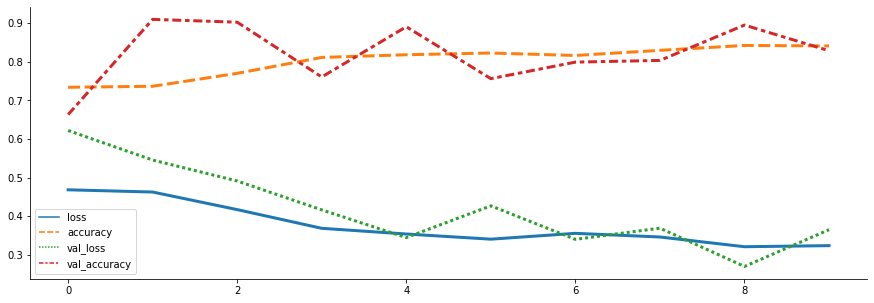

In [ ]:
lossGraph(modelConPCA_conBalanceoUnder)

Sin escalado con PCA con balaceo SMOTE

In [ ]:
X_train,X_test,y_train,y_test = trainTestSplit(generarPCA(2,X_sm),y_sm)
modelConPCA_conBalanceoSmote = modelo()

In [ ]:
modelConPCA_conBalanceoSmote.fit(x=X_train,y=y_train,validation_data=(X_test,y_test),batch_size=13,epochs=10,verbose=1)

Epoch 1/10
331/331 [==============================] - 3s 5ms/step - loss: 0.4391 - accuracy: 0.7559 - val_loss: 0.4767 - val_accuracy: 0.8585
Epoch 2/10
331/331 [==============================] - 1s 3ms/step - loss: 0.3465 - accuracy: 0.8304 - val_loss: 0.2941 - val_accuracy: 0.9056
Epoch 3/10
331/331 [==============================] - 1s 4ms/step - loss: 0.3346 - accuracy: 0.8398 - val_loss: 0.2524 - val_accuracy: 0.9214
Epoch 4/10
331/331 [==============================] - 1s 4ms/step - loss: 0.2856 - accuracy: 0.8642 - val_loss: 0.2303 - val_accuracy: 0.9024
Epoch 5/10
331/331 [==============================] - 1s 4ms/step - loss: 0.2776 - accuracy: 0.8696 - val_loss: 0.2194 - val_accuracy: 0.9230
Epoch 6/10
331/331 [==============================] - 1s 4ms/step - loss: 0.2845 - accuracy: 0.8763 - val_loss: 0.2495 - val_accuracy: 0.8124
Epoch 7/10
331/331 [==============================] - 1s 4ms/step - loss: 0.2753 - accuracy: 0.8805 - val_loss: 0.2487 - val_accuracy: 0.8129
Epoch 

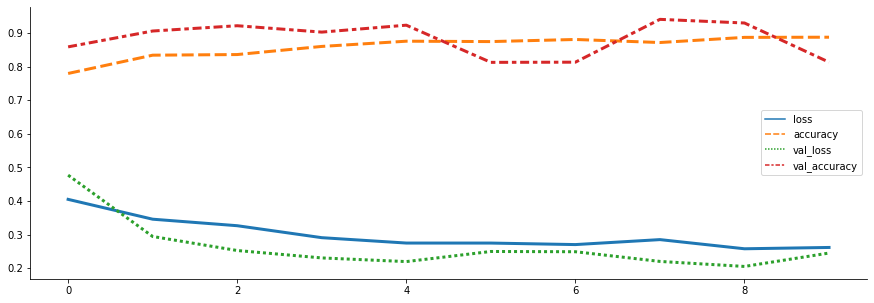

In [ ]:
lossGraph(modelConPCA_conBalanceoSmote)

**LogisticRegression**


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)

In [ ]:
modelLogicRegression=LogisticRegression(random_state=7).fit(X_train,y_train)

In [ ]:
pred(modelLogicRegression,X_test,y_test)

0.9285714285714286

In [ ]:
r2_score(y_train, modelLogicRegression.predict(X_train))

0.6741887807998588

In [ ]:
mean_absolute_error(y_train, modelLogicRegression.predict(X_train))

0.06279761904761905

In [ ]:
def accuracy_function(tp,tn,fp,fn):
    
    accuracy = (tp+tn) / (tp+tn+fp+fn)
    
    return accuracy

In [ ]:
def precision_function(tp,fp):
    
    precision = tp / (tp+fp)
    
    return precision

In [ ]:
def recall_function(tp,fn):
    
    recall=tp / (tp+fn)
    
    return recall

In [ ]:
def confusion_matrix(truth,predicted):
    
    true_positive = 0
    true_negative = 0
    false_positive = 0
    false_negative = 0
    
    for true,pred in zip(truth,predicted):
        if true == 1:
            if pred == true:
                true_positive += 1
            elif pred != true:
                false_negative += 1

        elif true == 0:
            if pred == true:
                true_negative += 1
            elif pred != true:
                false_positive += 1
            
    accuracy=accuracy_function(true_positive, true_negative, false_positive, false_negative)
    precision=precision_function(true_positive, false_positive)
    recall=recall_function(true_positive, false_negative)
    
    return (accuracy,
            precision,
           recall)

In [ ]:
 pred=modelLogicRegression.predict(X_test)

In [ ]:
accuracy,precision,recall=confusion_matrix(y_test,pred)

In [ ]:
print(" Accuracy : {0} \n Precision : {1} \n Recall : {2}".format(accuracy, precision, recall))

 Accuracy : 0.9285714285714286 
 Precision : 0.9848484848484849 
 Recall : 0.7738095238095238


In [ ]:
from sklearn.metrics import precision_score
precision_score(y_test, pred)

0.9848484848484849

In [ ]:
from sklearn.metrics import recall_score
recall_score(y_test, pred)

0.7738095238095238

SVM

In [ ]:
clf = SVC(gamma='auto')
clf.fit(X_train, y_train)
pred_svm=clf.predict(X_test)

In [ ]:
accuracy,precision,recall=confusion_matrix(y_test,pred_svm)
print(" --SVM--\n Accuracy : {0} \n Precision : {1} \n Recall : {2}".format(accuracy, precision, recall))

 --SVM--
 Accuracy : 0.7642857142857142 
 Precision : 1.0 
 Recall : 0.21428571428571427


KNN

In [ ]:
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_train, y_train)

pred_knn = neigh.predict(X_test)

In [ ]:
accuracy,precision,recall=confusion_matrix(y_test,pred_knn)
print(" --KNN--\n Accuracy : {0} \n Precision : {1} \n Recall : {2}".format(accuracy, precision, recall))

 --KNN--
 Accuracy : 0.5845238095238096 
 Precision : 0.4193011647254576 
 Recall : 1.0


Decision Tree

In [ ]:
dt = tree.DecisionTreeClassifier()
dt = dt.fit(X_train, y_train)

pred_dt = dt.predict(X_test)

In [ ]:
accuracy,precision,recall=confusion_matrix(y_test,pred_dt)
print("  --Decision Tree--\n Accuracy : {0} \n Precision : {1} \n Recall : {2}".format(accuracy, precision, recall))

  --Decision Tree--
 Accuracy : 0.8726190476190476 
 Precision : 0.7019498607242339 
 Recall : 1.0
